In [131]:
from matplotlib import pyplot as plt
import matplotlib
import csv
import numpy as np
from tkinter import *
import tkinter
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.animation import FuncAnimation

In [2]:
def read_environment_from_file(file_path):
    data = []
    with open(file_path)as f:
        f_csv = csv.reader(f)
        # for each row
        for row in f_csv:
            rowlist = []
            # for each number in row
            for number in row:
                rowlist.append(int(number))
            # update global environment
            data.append(rowlist)
    return np.array(data)

In [3]:
# read data from file
geology = read_environment_from_file("./data/best.geology")
mway = read_environment_from_file("./data/best.mway")
pop = read_environment_from_file("./data/best.pop")

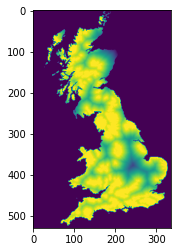

In [4]:
# show the geology data
plt.imshow(geology)

In [ ]:
cmap = plt.get_cmap("Reds")

def get_blue_img(img):
    """
    mark the top 10 area as blue
    params:
     - an image, shape (H, W)
    return:
     - an image, shape (H, W, 4) for rgba format
    """
    top10 = np.percentile(img.reshape(-1), 90, interpolation="nearest")
    norm = plt.Normalize()
    rgb = cmap(norm(img))
    shape = img.shape
    blue = np.stack([rgb[:,:,0],rgb[:,:,1], img/255, np.ones(shape)], -1)
    blue_img = np.where(img[:,:,None]>top10, blue, rgb)
    return blue_img

def draw(frame_num):
    """
    draw a figure
    """
    fig.clear()
    # compute the final figure by averaging the three graph
    final_fig = geology * geology_var.get() + mway * mway_var.get() + pop * pop_var.get()
    final_fig /= 3
    # check if we should mark the top 10 area as blue
    if show_in_blue.get() == 1:
        final_fig = get_blue_img(final_fig)
    # show the image
    plt.imshow(final_fig, cmap=cmap)

def update(n=None):
    """
    update the figure using animation
    """
    animation = FuncAnimation(fig, draw, frames=1, repeat=False)
    canvas.draw()
    
def save():
    """
    save the current figure data to a text file
    """
    final_fig = geology * geology_var.get() + mway * mway_var.get() + pop * pop_var.get()
    final_fig /= 3
    with open("./plot.txt", "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(final_fig.tolist())
    messagebox.showinfo("Save plot", "Successfully saved to plot.txt")

# create Tkinter
root = Tk()
# frame for scale bar and button
scale_frame = Frame(root)
scale_frame.pack(side=LEFT)
# frame for canvas
canvas_frame = Frame(root)
canvas_frame.pack(side=RIGHT)

# the ratio variables for each graph 
geology_var = DoubleVar()
geology_var.set(1)
mway_var = DoubleVar()
pop_var = DoubleVar()

# the label frame for each control bar
geology_label = LabelFrame(scale_frame, text="geology ratio")
mway_label = LabelFrame(scale_frame, text="transport ratio")
pop_label = LabelFrame(scale_frame, text="population ratio")

# the scale of each graph 
geology_scale = Scale(geology_label, command=update, orien=HORIZONTAL, variable = geology_var, from_=0.0, to=1.0, resolution =0.01, digits=3)
mway_scale = Scale(mway_label, command=update, orien=HORIZONTAL, variable = mway_var, from_=0.0, to=1.0, resolution =0.01, digits=3)
pop_scale = Scale(pop_label, command=update, orien=HORIZONTAL, variable = pop_var, from_=0.0, to=1.0, resolution =0.01, digits=3)

# add the components to the window 
geology_label.pack(anchor=NW)
geology_scale.pack(anchor=NW)
mway_label.pack(anchor=NW)
mway_scale.pack(anchor=NW)
pop_label.pack(anchor=NW)
pop_scale.pack(anchor=NW)

# check if we should add blue area
show_in_blue = IntVar()
checkbox = Checkbutton(scale_frame, text="show top 10 in blue", variable=show_in_blue, onvalue=1, offvalue=0, command=update)
checkbox.pack(anchor=N)

# the button to save image data
button = Button(scale_frame, text="Save plot", command=save)
button.pack(anchor=N)

# initialize a figure 
fig = plt.figure(figsize=(7, 7))
draw(1)
# initialize a canvas 
canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
canvas._tkcanvas.pack(side=tkinter.TOP, fill=tkinter.BOTH, expand=1)

# run
root.mainloop()

### Demo:

![SegmentLocal](plot_demo.gif "segment")